In [ ]:
#Capstone Project - TWO
#House Price Prediction

In [ ]:
#As mentioned in "04_preprocessing_and_training.ipynb" of Capstone Project Two, 
#Random Forest Regression model is giving the better accuracy as mean absolute error is the least 
#among all other models.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the housing dataset 
housing_data = pd.read_csv('/data/new_housing_data_cleaned.csv')

In [9]:
from sklearn.preprocessing import OneHotEncoder

s = (housing_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of categorical features:' , len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical features: 4


In [10]:
from sklearn.preprocessing import OneHotEncoder
#Applying OneHotEncoding
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(housing_data[object_cols]))
OH_cols.index = housing_data.index
OH_columns = OH_encoder.get_feature_names_out()
df_final = housing_data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [11]:
#Splitting data set into training and testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
y = df_final['SalePrice']

X_train, X_valid, y_train, y_valid, = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [17]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
#Converting feature column to string
X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)
model_RFR = RandomForestRegressor( n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1)
model_RFR.fit(X_train, y_train)
y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(y_valid, y_pred)

0.18503141496130093


Model Evaluation Metrics:
Mean Absolute Error (MAE): $30273.00
Root Mean Squared Error (RMSE): $42438.88
R² Score: 0.3340
Mean Absolute Percentage Error (MAPE): 0.19%

Feature Importance:
         Feature  Importance
6    TotalBsmtSF    0.297740
3      YearBuilt    0.228104
1        LotArea    0.188405
4   YearRemodAdd    0.081753
0     MSSubClass    0.050353
2    OverallCond    0.034860
28            21    0.026789
35            28    0.013670
5     BsmtFinSF2    0.011917
34            27    0.008258
12             5    0.007900
25            18    0.006757
16             9    0.006349
27            20    0.005577
13             6    0.004673
11             4    0.004198
10             3    0.002899
30            23    0.002777
33            26    0.002503
14             7    0.001892
36            29    0.001786
17            10    0.001693
8              1    0.001475
7              0    0.001429
32            25    0.001326
31            24    0.001301
22            15    0.000845

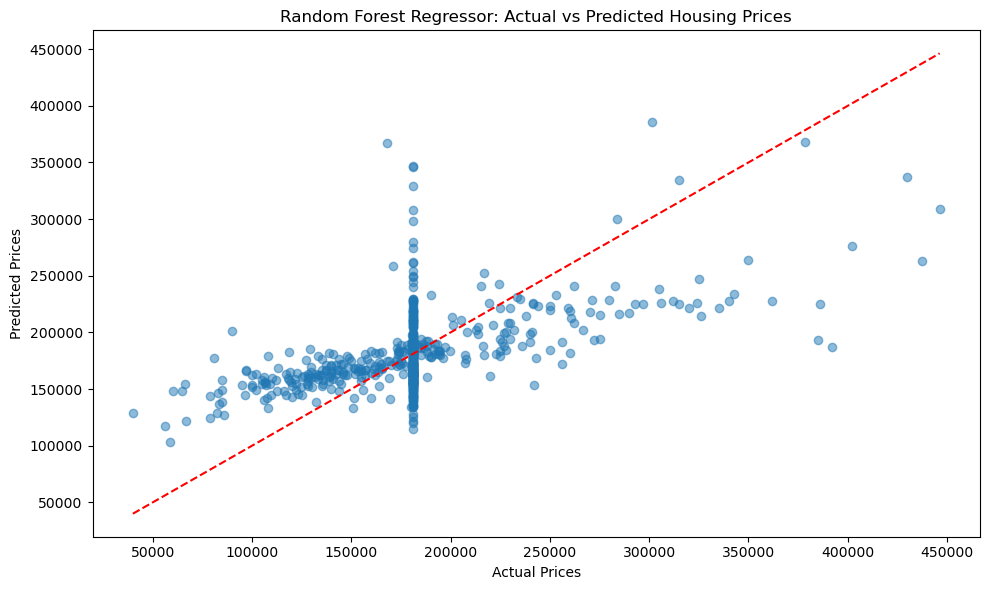

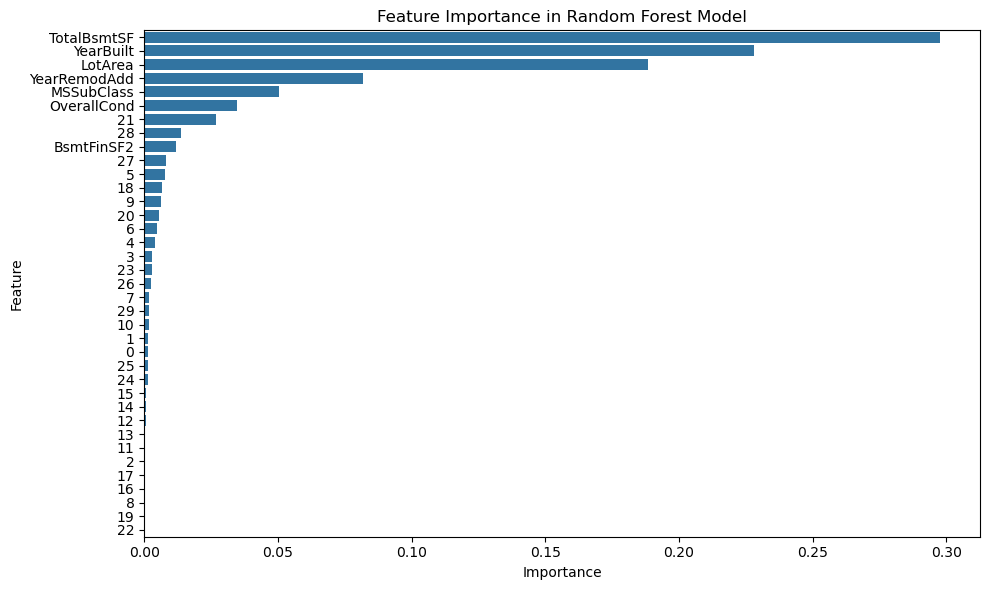

In [18]:

# Make predictions
y_pred = model_RFR.predict(X_valid)

# Calculate metrics
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

mape = mean_absolute_percentage_error(y_valid, y_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_RFR.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regressor: Actual vs Predicted Housing Prices')
plt.tight_layout()
plt.show()

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()